# **Pipeline = Blocks**

- **Block 1. Create a Temporary Folder (create_tmp_folder) & Download Launches Data(download_launches):**
> This step will ensure that the necessary directories exist before proceeding with downloading and processing data. In this step, we'll fetch data from an external API and save it to a local JSON file.
- **Block 2. Get Pictures (get_pictures):**
> This part involves reading the downloaded JSON, extracting image URLs, and downloading these images to a specified directory.
- **Block 3. Notify (notify):**
> Finally, a simple notification step that counts the images downloaded and outputs a message.


<img src ='https://t4.ftcdn.net/jpg/05/39/88/87/360_F_539888762_pU6WAEuRv8sWB3Paqae7J0lHdPprEdoJ.jpg'>

## **Block 1: Create a Temporary Folder & Download Launches Data**
> ### **@data_loader**

In [1]:
import os
os.getcwd()

'/content'

In [2]:
cur_dir = os.getcwd()
cur_dir

'/content'

In [3]:
print(cur_dir)
print(f"{cur_dir}/rocket")

/content
/content/rocket


In [4]:
#os.makedirs(f"rocket1/rocke2/rocke3", exist_ok=True)
os.makedirs('rocket', exist_ok = True)

In [5]:
import requests
url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
response = requests.get(url)
print(response)

<Response [200]>


In [6]:
print(type(response.content))

<class 'bytes'>


In [7]:
print(response.content) # binary file

b'{"count":349,"next":"https://ll.thespacedevs.com/2.0.0/launch/upcoming/?limit=10&offset=10","previous":null,"results":[{"id":"08508c47-42ea-44c8-9da6-9e2e21742994","url":"https://ll.thespacedevs.com/2.0.0/launch/08508c47-42ea-44c8-9da6-9e2e21742994/","launch_library_id":null,"slug":"falcon-9-block-5-starlink-group-6-49","name":"Falcon 9 Block 5 | Starlink Group 6-49","status":{"id":1,"name":"Go"},"net":"2024-04-13T01:22:00Z","window_end":"2024-04-13T04:48:00Z","window_start":"2024-04-13T01:22:00Z","inhold":false,"tbdtime":false,"tbddate":false,"probability":98,"holdreason":"","failreason":"","hashtag":null,"launch_service_provider":{"id":121,"url":"https://ll.thespacedevs.com/2.0.0/agencies/121/","name":"SpaceX","type":"Commercial"},"rocket":{"id":8217,"configuration":{"id":164,"launch_library_id":188,"url":"https://ll.thespacedevs.com/2.0.0/config/launcher/164/","name":"Falcon 9","family":"Falcon","full_name":"Falcon 9 Block 5","variant":"Block 5"}},"mission":{"id":6789,"launch_libr

In [8]:
print(response.text)   # text file

{"count":349,"next":"https://ll.thespacedevs.com/2.0.0/launch/upcoming/?limit=10&offset=10","previous":null,"results":[{"id":"08508c47-42ea-44c8-9da6-9e2e21742994","url":"https://ll.thespacedevs.com/2.0.0/launch/08508c47-42ea-44c8-9da6-9e2e21742994/","launch_library_id":null,"slug":"falcon-9-block-5-starlink-group-6-49","name":"Falcon 9 Block 5 | Starlink Group 6-49","status":{"id":1,"name":"Go"},"net":"2024-04-13T01:22:00Z","window_end":"2024-04-13T04:48:00Z","window_start":"2024-04-13T01:22:00Z","inhold":false,"tbdtime":false,"tbddate":false,"probability":98,"holdreason":"","failreason":"","hashtag":null,"launch_service_provider":{"id":121,"url":"https://ll.thespacedevs.com/2.0.0/agencies/121/","name":"SpaceX","type":"Commercial"},"rocket":{"id":8217,"configuration":{"id":164,"launch_library_id":188,"url":"https://ll.thespacedevs.com/2.0.0/config/launcher/164/","name":"Falcon 9","family":"Falcon","full_name":"Falcon 9 Block 5","variant":"Block 5"}},"mission":{"id":6789,"launch_librar

In [9]:
# 바이너리 I/O
with open(f"rocket/launches.json", "wb") as f:
    f.write(response.content)

In [10]:
# 텍스트 I/O
with open(f"rocket/launches.json", "w") as f:
    f.write(response.text)

In [11]:
import requests

def download_launches():
    cur_dir = '/content'
    url = 'https://ll.thespacedevs.com/2.0.0/launch/upcoming'
    os.makedirs(f"rocket", exist_ok=True)

    print(f"wahrer r u? : {cur_dir}/rocket")

    response = requests.get(url)

    with open(f"rocket/launches.json", "wb") as f:
        f.write(response.content)

    data = response.json()

    return pd.DataFrame(data)

In [12]:
import pandas as pd
download_launches()

wahrer r u? : /content/rocket


,count,next,previous,results
0,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '08508c47-42ea-44c8-9da6-9e2e21742994',..."
1,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '3e464c4a-8222-401c-b2e3-9c90a43f4703',..."
2,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '629f10e4-93cc-4b1b-9b2f-53f7d3944fc1',..."
3,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': 'c42e2d5f-f869-44d2-9f70-77d6e8d8482f',..."
4,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '974b4774-cda7-4373-abfc-40c1a1859cba',..."
5,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '607135c8-8090-4f5e-8bd3-d69bef2f2618',..."
6,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '12978b64-816d-4ab1-b15f-44f237a0c083',..."
7,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '05864985-e660-4723-b489-32a78d4b53fc',..."
8,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '1458b11c-c0ed-4486-9d51-5b574db36f71',..."
9,349,https://ll.thespacedevs.com/2.0.0/launch/upcom...,None,"{'id': '172111f8-35c3-413e-9f6e-06676a462895',..."


## **Block 2: Get Pictures**
- This block will be a direct translation of the _get_pictures function from your Airflow script.
> ### **@data_transformer**

In [13]:
import json
os.makedirs(f"images", exist_ok=True)
with open("./rocket/launches.json") as f:
    launches = json.load(f)

launches.keys()

dict_keys(['count', 'next', 'previous', 'results'])

In [14]:
print(type(launches["results"]))

<class 'list'>


In [15]:
launches["results"][0].keys()

dict_keys(['id', 'url', 'launch_library_id', 'slug', 'name', 'status', 'net', 'window_end', 'window_start', 'inhold', 'tbdtime', 'tbddate', 'probability', 'holdreason', 'failreason', 'hashtag', 'launch_service_provider', 'rocket', 'mission', 'pad', 'webcast_live', 'image', 'infographic', 'program'])

In [16]:
len(launches["results"])

10

In [17]:
print(type(launches["results"][0]))

<class 'dict'>


In [18]:
launches["results"][0]['image']

'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png'

In [19]:
for launch in launches["results"]:
    print(launch["image"])

https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/electron_image_20190705175640.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/long_march_2_image_20210908195835.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/gaganyaan_abort_image_20231021132156.jpeg
https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_2022

In [20]:
import json
import requests
import requests.exceptions as requests_exceptions
import os

def get_pictures(*args, **kwargs):
    os.makedirs(f"image", exist_ok=True)
    with open("./rocket/launches.json") as f:
        launches = json.load(f)

    image_urls = [launch["image"] for launch in launches["results"]]
    print(image_urls)

    for image_url in image_urls:
        try:
            response = requests.get(image_url)
            image_filename = image_url.split("/")[-1]
            target_file = f"./image/{image_filename}"

            with open(target_file, "wb") as f:
                f.write(response.content)

            print(f"Downloaded {image_url} to {target_file}")

        except requests_exceptions.MissingSchema:
            print(f"{image_url} appears to be an invalid URL.")

        except requests_exceptions.ConnectionError:
            print(f"Could not connect to {image_url}.")

In [21]:
get_pictures()

['https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/long2520march25202d_image_20190222031211.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon2520925_image_20221009234147.png', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/falcon_9_image_20230807133459.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/electron_image_20190705175640.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/long_march_2_image_20210908195835.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/images/gaganyaan_abort_image_20231021132156.jpeg', 'https://spacelaunchnow-prod-east.nyc3.digitaloceanspaces.com/media/image

## **@data_exporter**

In [22]:
len(os.listdir("./images/"))

6

In [23]:
import os

def notify(*args, **kwargs):
    images_count = len(os.listdir("./images/"))
    if images_count > 0:
        print(f"There are now {images_count} images.")
    else :
        print("No images downloaded")



In [24]:
notify()

There are now 6 images.


### **이미지 시각화하기**
- chat GPT 에게 "이미지 파일을 불러와서 시각화하는 코드 한 줄에 5장씩" prompt로 문의

In [25]:
import glob
glob.glob('./image/*')

['./image/gaganyaan_abort_image_20231021132156.jpeg',
 './image/long2520march25202d_image_20190222031211.jpeg',
 './image/falcon2520925_image_20221009234147.png',
 './image/long_march_2_image_20210908195835.jpeg',
 './image/electron_image_20190705175640.jpeg',
 './image/falcon_9_image_20230807133459.jpeg']

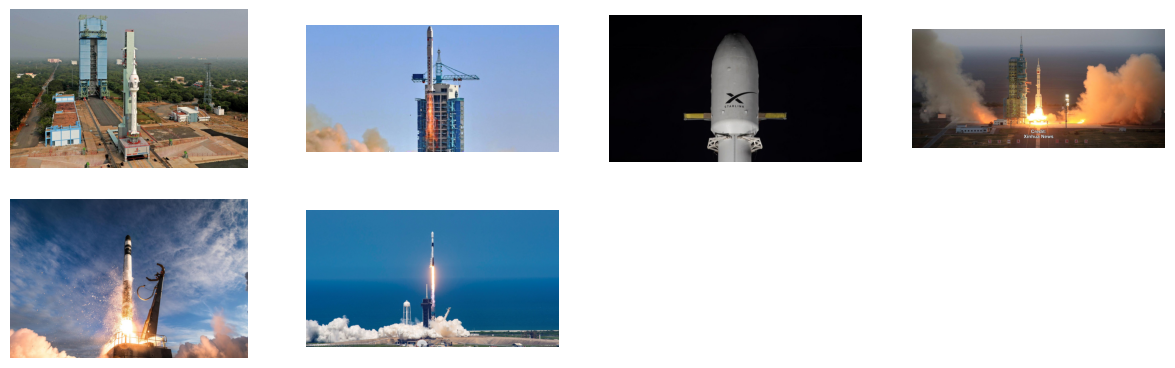

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_files = glob.glob('./image/*')

plt.figure(figsize=(15, 7))
for i, file in enumerate(image_files):
    plt.subplot(3, 4, i+1)  # 3행 4열의 그림 위치를 지정
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off')
plt.show()

# END